In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz #görselleştirme
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
df=pd.read_csv("heart.csv")

In [ ]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
y=df['output']
x=df.drop(columns=["output"])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dt=DecisionTreeClassifier()
model=dt.fit(x,y)
model.score(x,y)

1.0

In [ ]:
tree=DecisionTreeClassifier()
model=tree.fit(x_train,y_train)
model.score(x_test,y_test)


0.819672131147541

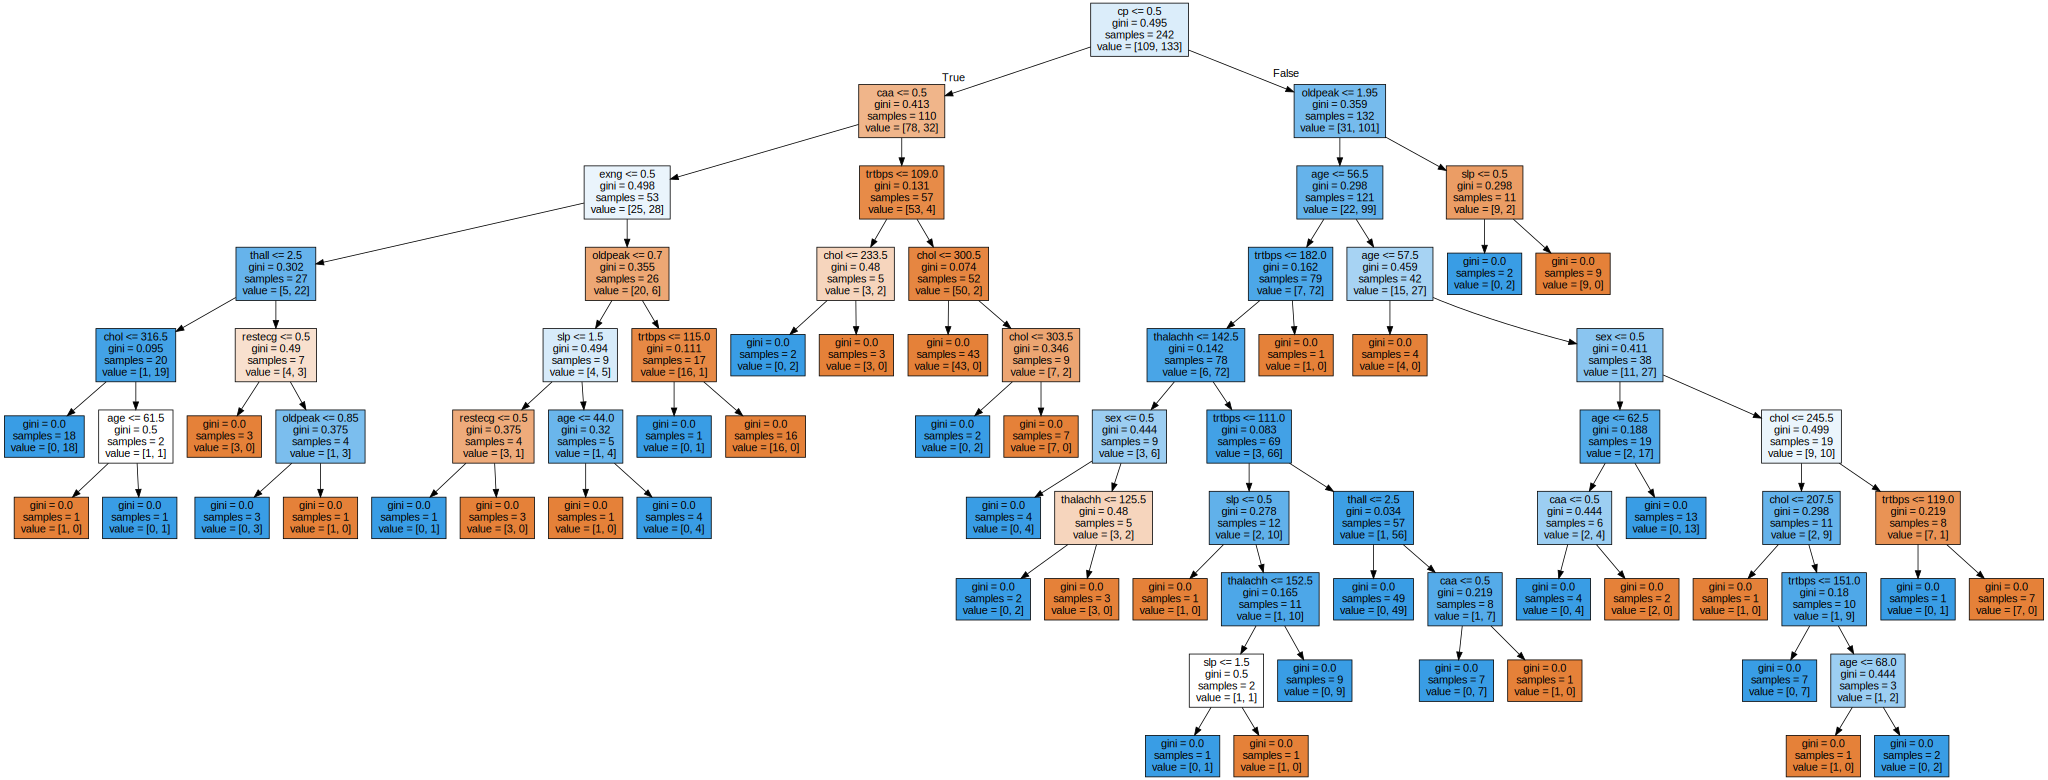

In [ ]:
dot=export_graphviz(model,feature_names=x.columns,filled=True)
gorsel=graphviz.Source(dot)
gorsel

In [ ]:
rf=xgb.XGBClassifier()  #boostingde ağaçlar geliştiriliyor.
model2=rf.fit(x_train,y_train)
model2.score(x_test,y_test)

0.819672131147541

In [ ]:
#tahmin için
insan=df.sample().drop("output",axis=1).values   #outputunu sildirerek tahmin edeceğimiz değeri bulmayı düşünüyoruz.sample() rastege bir değeri seçer

In [ ]:
model2.predict(insan)

array([0])